In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
fruits = pd.read_excel('fruits.xlsx')
print(fruits.shape)
fruits.head()


(60, 4)


,Color,Sphericity,Weight,labels
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


# Seperating the Features and label

In [7]:
X = fruits[['Sphericity','Weight']]
y = fruits['labels']

In [8]:
X.describe()

,Sphericity,Weight
count,60.000000,60.000000
mean,0.820583,142.750000
std,0.067577,23.352585
min,0.710000,101.000000
25%,0.767250,124.000000
50%,0.823000,143.000000
75%,0.870500,164.000000
max,0.947000,184.000000


# Min-Max scaling of the Features(X)

In [9]:
scaling = MinMaxScaler()
X = pd.DataFrame(scaling.fit_transform(X),columns=['Sphericity','Weight'])
X.describe()

,Sphericity,Weight
count,60.000000,60.000000
mean,0.466596,0.503012
std,0.285133,0.281356
min,0.000000,0.000000
25%,0.241561,0.277108
50%,0.476793,0.506024
75%,0.677215,0.759036
max,1.000000,1.000000


In [10]:
X.describe()

,Sphericity,Weight
count,60.000000,60.000000
mean,0.466596,0.503012
std,0.285133,0.281356
min,0.000000,0.000000
25%,0.241561,0.277108
50%,0.476793,0.506024
75%,0.677215,0.759036
max,1.000000,1.000000


In [11]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.25,random_state=54)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((45, 2), (15, 2), (45,), (15,))

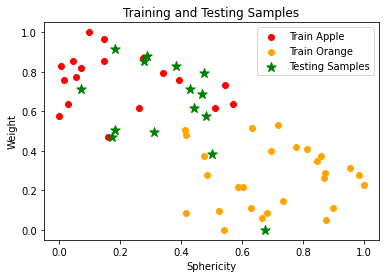

In [12]:
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apple')
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Orange')
plt.scatter(x='Sphericity',y='Weight',data=X_test,c='green',label='Testing Samples',marker='*',s=100)

plt.legend()
plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.title('Training and Testing Samples')
plt.show()

In [13]:
# import the class for implemting the ML Alogirthm
from sklearn.neighbors import KNeighborsClassifier
# create the object by calling the constructor
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train,y_train)
# Predict the Labels for the Test Features
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[11,  1],
       [ 1,  2]], dtype=int64)

In [14]:
y_train.value_counts()

Orange    27
Apple     18
Name: labels, dtype: int64

In [15]:
def plot_fruits():
    plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apple')
    plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Orange')
    plt.scatter(x='Sphericity',y='Weight',data=X_test[y_test==y_predict],c='green',label='Correctly Classified',marker='*',s=100)
    plt.scatter(x='Sphericity',y='Weight',data=X_test[y_test!=y_predict],c='blue',label='Wrongly Classified',marker='*',s=100)
    plt.legend()
    plt.xlabel("Sphericity")
    plt.ylabel("Weight")
    plt.title('Training and Testing Samples')
    plt.show()

[[8 2]
 [0 5]]


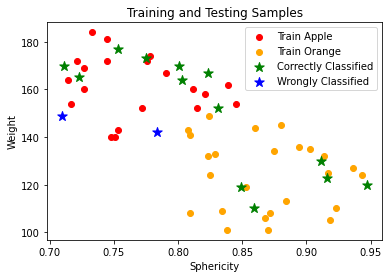

In [16]:
X = fruits[['Sphericity','Weight']]
y = fruits['labels']
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.25,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(confusion_matrix(y_test,y_predict))
plot_fruits()

[[10  0]
 [ 0  5]]


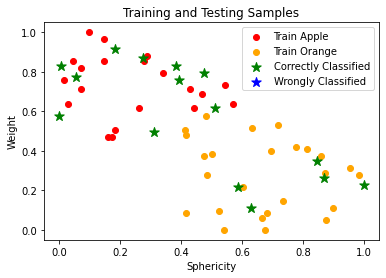

In [17]:
X = fruits[['Sphericity','Weight']]
y = fruits['labels']
scaling = MinMaxScaler()
X = pd.DataFrame(scaling.fit_transform(X),columns=['Sphericity','Weight'])
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.25,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(confusion_matrix(y_test,y_predict))
plot_fruits()